In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
cityDF= pd.read_csv(city_data_to_load, low_memory=False)
rideDF= pd.read_csv(ride_data_to_load, low_memory=False)
cityDF.head()
rideDF.head()
# Combine the data into a single dataset

# Display the data table for preview


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [2]:
mergedDF = pd.merge(cityDF, rideDF, on = "city")
mergedDF

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850
5,Richardfort,38,Urban,2018-04-21 03:44:04,9.54,3698147103219
6,Richardfort,38,Urban,2018-02-03 00:14:26,29.04,4982665519010
7,Richardfort,38,Urban,2018-02-08 15:50:12,16.55,2270463070874
8,Richardfort,38,Urban,2018-04-03 15:07:34,40.77,9496210735824
9,Richardfort,38,Urban,2018-02-19 14:09:20,27.11,8690324801449


## Bubble Plot of Ride Sharing Data

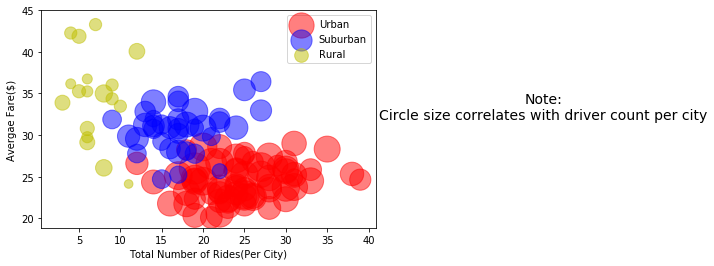

In [3]:
# Obtain the x and y coordinates for each of the three city types
urbanDF = mergedDF.loc[mergedDF["type"] == "Urban",:]
urbanX = urbanDF["city"].value_counts()
urbanY = urbanDF.groupby("city")["fare"].mean()
urbanS = urbanDF.groupby("city")["driver_count"].value_counts()

suburbanDF = mergedDF.loc[mergedDF["type"] == "Suburban",:]
suburbanX = suburbanDF["city"].value_counts()
suburbanY = suburbanDF.groupby("city")["fare"].mean()
suburbanS = suburbanDF.groupby("city")["driver_count"].value_counts()

ruralDF = mergedDF.loc[mergedDF["type"] == "Rural",:]
ruralX = ruralDF["city"].value_counts()
ruralY = ruralDF.groupby("city")["fare"].mean()
ruralS = ruralDF.groupby("city")["driver_count"].value_counts()

# Build the scatter plots for each city types
plt.scatter(urbanX, urbanY,s = urbanS*25, color = "r", alpha = 0.5, label = "Urban")
plt.scatter(suburbanX, suburbanY,s = suburbanS*25, color = "b", alpha = 0.5, label = "Suburban")
plt.scatter(ruralX, ruralY,s = ruralS*25, color = "y", alpha = 0.5, label = "Rural")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Avergae Fare($)")
# Create a legend
plt.legend(loc='upper right')
# Incorporate a text label regarding circle size
plt.annotate('Note:\nCircle size correlates with driver count per city',
            xy=(1.5, 0.5), xytext=(0, 10),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=14, ha='center', va='bottom')
# Save Figure
plt.savefig('pyberScatter.png')

In [4]:
# Show plot
plt.show()

## Total Fares by City Type

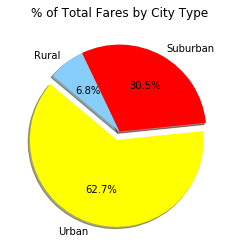

<Figure size 432x288 with 0 Axes>

In [5]:
# Calculate Type Percents
urbanPie = urbanDF["fare"].sum()
suburbanPie = suburbanDF["fare"].sum()
ruralPie = ruralDF["fare"].sum()

labels = ["Urban", "Suburban", "Rural"]
sizes = [urbanPie, suburbanPie, ruralPie]
colors = ["yellow", "red", "lightskyblue"]
explode = (0.1, 0.0, 0.0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.show()
# Save Figure
plt.savefig('pyberPieFare.png')

In [6]:
# Show Figure
plt.show()

## Total Rides by City Type

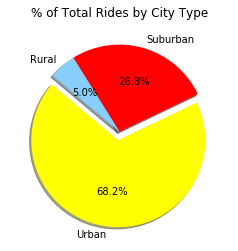

<Figure size 432x288 with 0 Axes>

In [7]:
# Calculate Type Percents
urbanPie2 = urbanDF["ride_id"].sum()
suburbanPie2 = suburbanDF["ride_id"].sum()
ruralPie2 = ruralDF["ride_id"].sum()

labels = ["Urban", "Suburban", "Rural"]
sizes = [urbanPie2, suburbanPie2, ruralPie2]
colors = ["yellow", "red", "lightskyblue"]
explode = (0.1, 0.0, 0.0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.show()
# Save Figure
plt.savefig('pyberPieRide.png')

In [8]:
# Show Figure
plt.show()

## Total Drivers by City Type

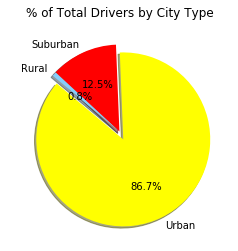

<Figure size 432x288 with 0 Axes>

In [9]:
# Calculate Type Percents
urbanPie3 = urbanDF["driver_count"].sum()
suburbanPie3 = suburbanDF["driver_count"].sum()
ruralPie3 = ruralDF["driver_count"].sum()

labels = ["Urban", "Suburban", "Rural"]
sizes = [urbanPie3, suburbanPie3, ruralPie3]
colors = ["yellow", "red", "lightskyblue"]
explode = (0.1, 0.0, 0.0)

# Build Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.show()
# Save Figure
plt.savefig('pyberPieDriver.png')

In [10]:
# Show Figure
plt.show()